# Load Data

In [1]:
!mkdir image_classification_project

In [2]:
from bing_image_downloader import downloader
downloader.download("Violin",limit=60,output_dir='image_classification_project',adult_filter_off=True)
downloader.download("Sheep",limit=60,output_dir='image_classification_project',adult_filter_off=True)

[%] Downloading Images to C:\Users\Dell\image_classification_project\Violin


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from http://upload.wikimedia.org/wikipedia/commons/f/f4/German,_maple_Violin.JPG
[%] File Downloaded !

[%] Downloading Image #2 from https://d1aeri3ty3izns.cloudfront.net/media/32/321480/1200/preview.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.notestem.com/uploads/violin-for-beginners.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://images.pexels.com/photos/3120109/pexels-photo-3120109.jpeg?cs=srgb&amp;dl=close-up-photo-of-violin-3120109.jpg&amp;fm=jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://d1aeri3ty3izns.cloudfront.net/media/41/413535/1200/preview.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.corilon.com/shop_userdata/1/items/757_1_markneukirchen_1.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://www.aschroetter.com/web/image/

# Data Preprocessing

In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

In [4]:
target = []
images= []
flat_data = []

In [5]:
DATADIR = r"C:\Users\Dell\image_classification_project"
CATEGORIES = ['violin','sheep']

In [6]:
for category in CATEGORIES:
    class_num = CATEGORIES.index(category)
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_arr = imread(os.path.join(path,img))
        img_resized = resize(img_arr,(150,150,3))  #resizing
        flat_data.append(img_resized.flatten())
        images.append(img_resized)
        target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [7]:
len(flat_data[0])

67500

In [8]:
150*150*3

67500

In [9]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

<BarContainer object of 2 artists>

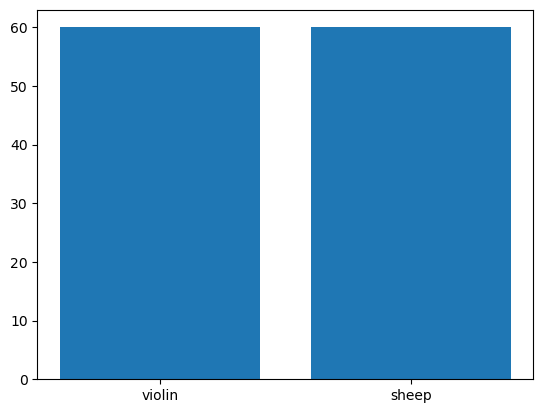

In [10]:
uique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

# Split data into training and testing

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

# SVC Model

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
    {'C':[1,10,100,1000], 'kernel':['linear']},
    {'C':[1,10,100,1000], 'gamma':[0.001,0.0001], 'kernel':['rbf']},  
]
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
Acc_SVC= accuracy_score(y_pred,y_test)*100
print(f'Accuracy: {Acc_SVC:.2f}%')

Accuracy: 94.44%


Confusion Matrix is : 
 [[16  1]
 [ 1 18]]


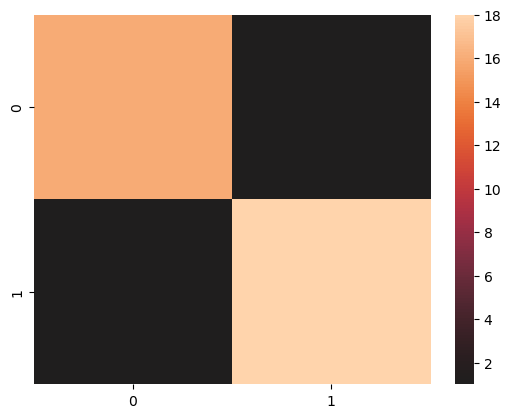

In [20]:
import seaborn as sns
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)
sns.heatmap(CM, center = True)
plt.show()

# KNN Model

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
}

knn = KNeighborsClassifier()
clf_knn = GridSearchCV(knn, param_grid_knn, cv=5)
clf_knn.fit(x_train, y_train)
y_pred = clf_knn.predict(x_test)
Acc_knn= accuracy_score(y_pred,y_test)*100

print(f'Accuracy: {Acc_knn:.2f}%')

Accuracy: 86.11%


Confusion Matrix is : 
 [[12  5]
 [ 0 19]]


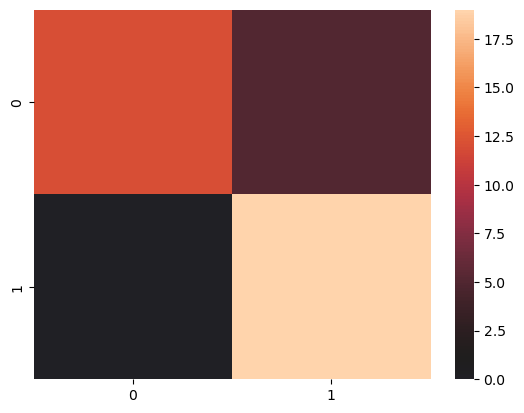

In [22]:
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)
sns.heatmap(CM, center = True)
plt.show()

# Random forest Model

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
}

rf = RandomForestClassifier(random_state=42)
clf_rf = GridSearchCV(rf, param_grid_rf, cv=5)
clf_rf.fit(x_train, y_train)
y_pred = clf_rf.predict(x_test)
Acc_rf= accuracy_score(y_pred,y_test)*100
print(f'Accuracy: {Acc_rf:.2f}%')

Accuracy: 94.44%


Confusion Matrix is : 
 [[16  1]
 [ 1 18]]


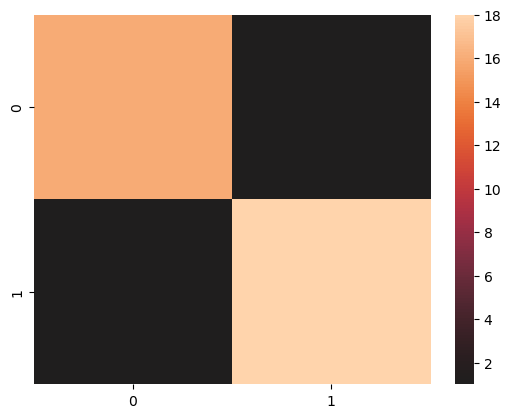

In [26]:
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)
sns.heatmap(CM, center = True)
plt.show()

# Logistic Regression 

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid_logistic = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [1000],  
}

logistic = LogisticRegression(random_state=42)

clf_logistic = GridSearchCV(logistic, param_grid_logistic, cv=5)
clf_logistic.fit(x_train, y_train)

y_pred = clf_logistic.predict(x_test)
Acc_logistic= accuracy_score(y_pred,y_test)*100
print(f'Accuracy: {Acc_logistic:.2f}%')

Accuracy: 91.67%


Confusion Matrix is : 
 [[15  2]
 [ 1 18]]


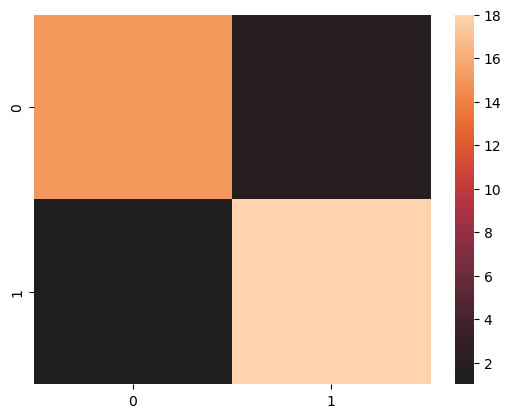

In [29]:
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)
sns.heatmap(CM, center = True)
plt.show()

# Decision tree Model

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

dt = DecisionTreeClassifier(random_state=42)
clf_dt = GridSearchCV(dt, param_grid_dt, cv=5)
clf_dt.fit(x_train, y_train)
y_pred = clf_dt.predict(x_test)
Acc_dt= accuracy_score(y_pred,y_test)*100
print(f'Accuracy: {Acc_dt:.2f}%')

Accuracy: 72.22%


Confusion Matrix is : 
 [[12  5]
 [ 5 14]]


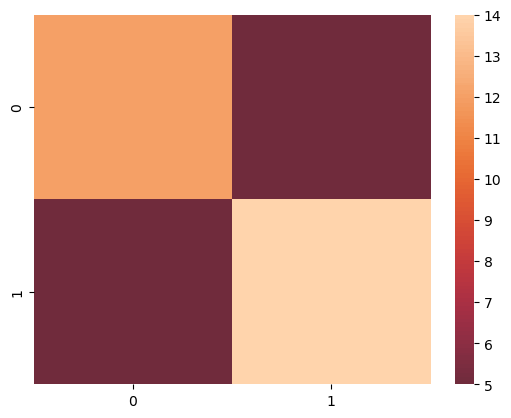

In [31]:
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)
sns.heatmap(CM, center = True)
plt.show()

# Naive bayes Model

In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred_nb = nb.predict(x_test)
acc_nb = accuracy_score(y_pred_nb, y_test) * 100
print(f'Accuracy: {acc_nb:.2f}%')

Accuracy: 91.67%


Confusion Matrix is : 
 [[15  2]
 [ 1 18]]


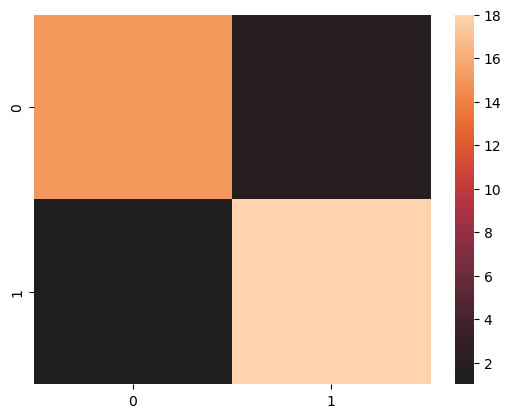

In [38]:
CM = confusion_matrix(y_test, y_pred_nb)
print('Confusion Matrix is : \n', CM)
sns.heatmap(CM, center = True)
plt.show()

# Save SVC Model

In [43]:
import pickle 
pickle.dump(clf,open('img_svc_model.p','wb'))

In [44]:
model = pickle.load(open('img_svc_model.p','rb'))

Enter the URL: https://m.media-amazon.com/images/W/MEDIAX_792452-T2/images/I/61EmtbgoMmL._AC_UF1000,1000_QL80_.jpg
(1000, 729, 3)
 Predicted Output: violin


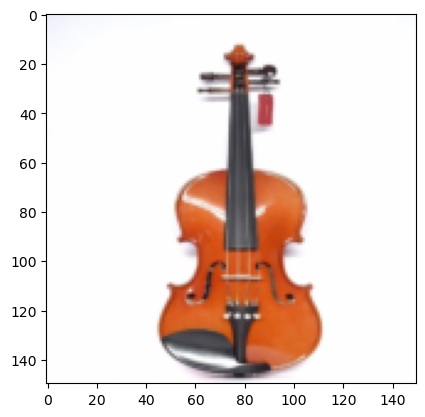

In [45]:
flat_data_test = []
url = input('Enter the URL: ')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data_test.append(img_resized.flatten())
flat_data_test = np.array(flat_data_test)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data_test)
y_out = CATEGORIES[y_out[0]]
print(f' Predicted Output: {y_out}')

Enter the URL: https://www.kalmbachfeeds.com/wp-content/uploads/2022/08/sheep-grazing-on-pasture-up-close.jpg
(628, 1200, 3)
 Predicted Output: sheep


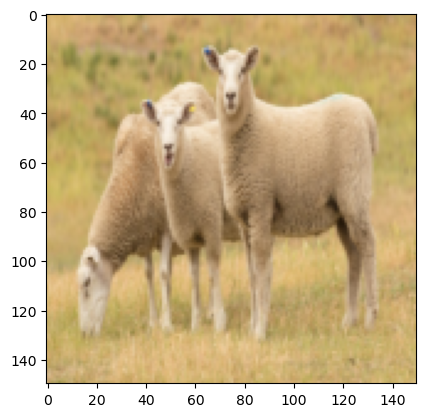

In [46]:
flat_data_test = []
url = input('Enter the URL: ')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data_test.append(img_resized.flatten())
flat_data_test = np.array(flat_data_test)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data_test)
y_out = CATEGORIES[y_out[0]]
print(f' Predicted Output: {y_out}')